# Requirements

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [3]:
# Write your code here. Add as many boxes as you need
data = pd.read_csv('blood_pressure_data.csv')
df = data.copy()
df.sample(5)

id        age  height(cm)  weight(kg)  relaxation  blood sugar  \
8721       NaN        NaN       170.0        70.0        63.0         91.0   
5788   84257.0        NaN       170.0         NaN        74.0          NaN   
1069   37648.0        NaN       145.0         NaN        70.0          NaN   
3354  144643.0   4/5/1969       165.0         NaN        68.0        103.0   
4323  107853.0  1/28/1974       155.0        50.0         NaN          NaN   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
8721          NaN          NaN  50.0    NaN        15.1            1.0   
5788        204.0       NORMAL  57.0    NaN        15.5            1.0   
1069        179.0          LOW   NaN    NaN        15.4            1.0   
3354        197.0       NORMAL  42.0  127.0        14.8            1.0   
4323        221.0          LOW   NaN  125.0        12.3            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
8721               0.9  31.0  22.0  15.0            No           133.0  
5788               1.1   NaN  35.0  42.0            No             NaN  
1069               0.7  39.0  55.0  34.0            No             NaN  
3354               1.1   NaN   NaN  26.0            No             NaN  
4323               0.6   NaN  23.0  15.0            No             NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7328 non-null   float64
 1   age               7312 non-null   object 
 2   height(cm)        7373 non-null   float64
 3   weight(kg)        7444 non-null   float64
 4   relaxation        7425 non-null   float64
 5   blood sugar       7438 non-null   float64
 6   Cholesterol       7386 non-null   float64
 7   triglyceride      8644 non-null   object 
 8   HDL               7391 non-null   float64
 9   LDL               7358 non-null   float64
 10  hemoglobin        7417 non-null   float64
 11  Urine protein     7475 non-null   float64
 12  serum creatinine  7433 non-null   float64
 13  AST               7427 non-null   float64
 14  ALT               7416 non-null   float64
 15  Gtp               7411 non-null   float64
 16  dental caries     10000 non-null  object 

Explore the dataset using visualizations of your choice.

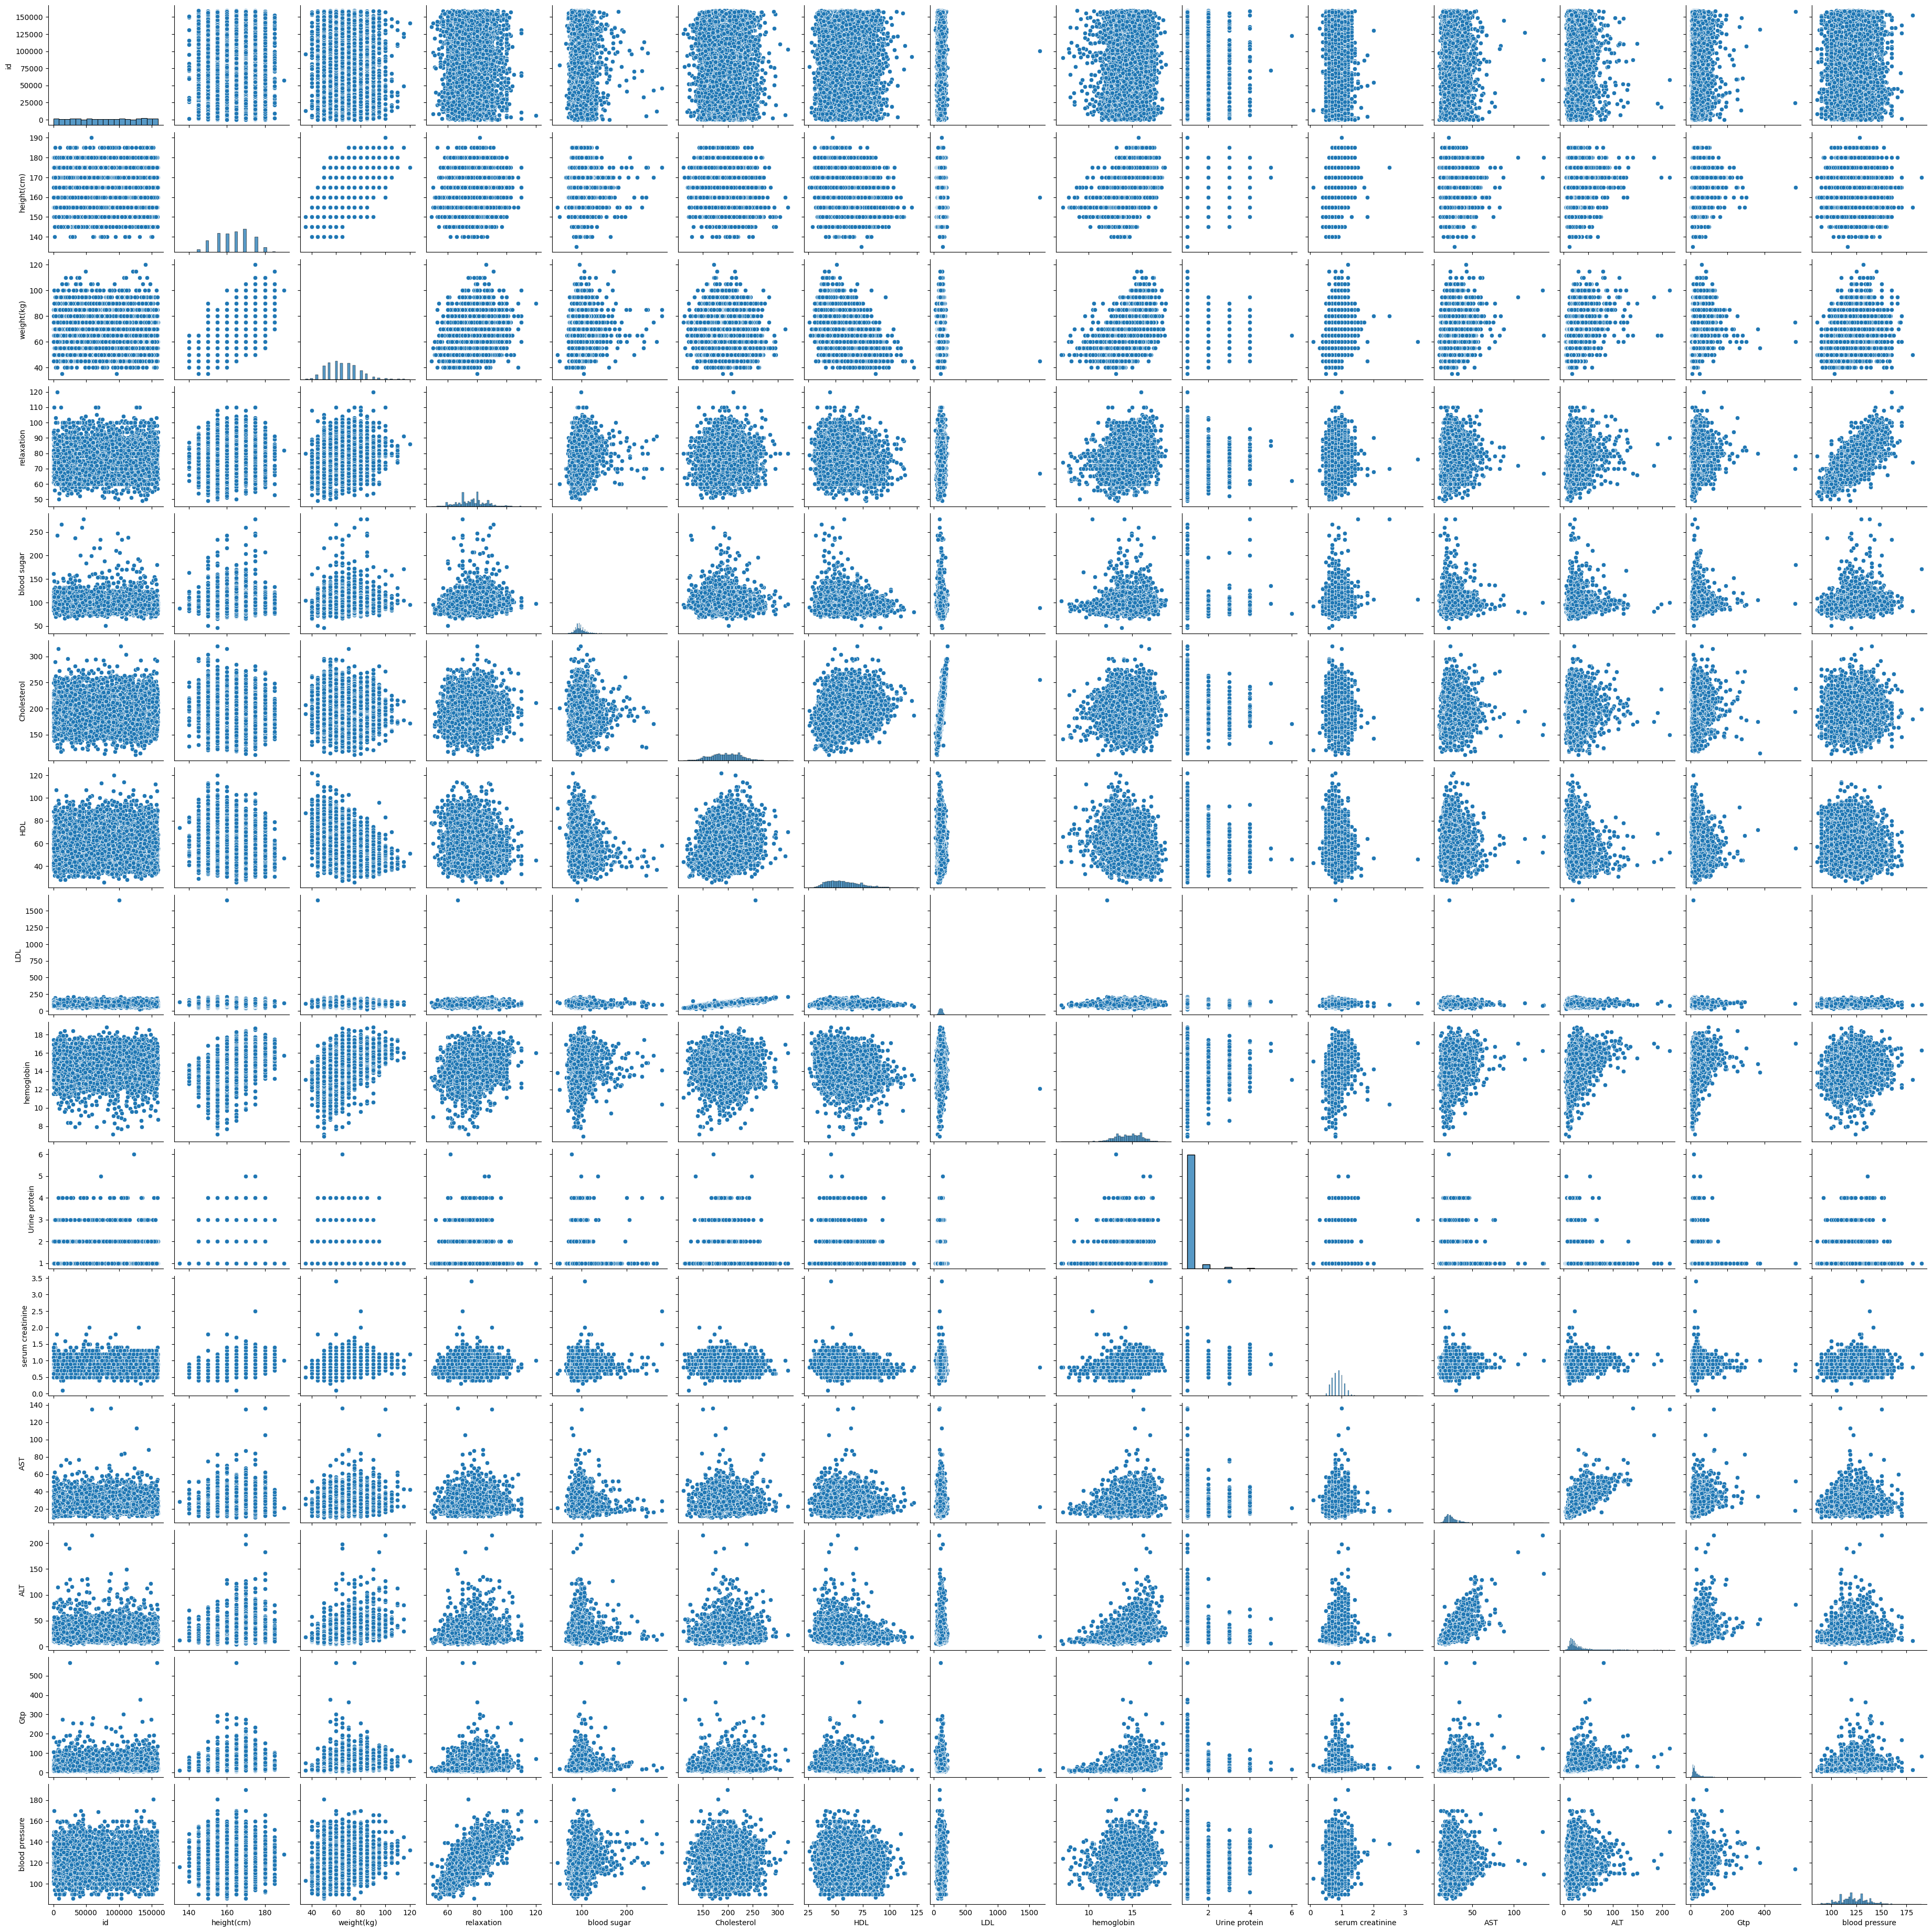

In [13]:
import seaborn as sns
sns.pairplot(df)

In [5]:
df['blood pressure'].unique()

array([112., 138., 137., 133.,  nan, 120., 132., 114., 100., 136., 118.,
       130., 104., 150., 117., 103., 110., 148., 111., 152., 141., 128.,
       122., 124., 125., 143., 129., 170., 126., 121., 142., 116.,  97.,
       131., 123., 106., 134., 107., 119., 109., 146., 108., 101., 115.,
       140., 139., 135., 157., 102., 113., 147., 127., 145.,  94., 105.,
       168.,  90., 144.,  98., 151.,  89., 158.,  96.,  99.,  93.,  92.,
       155., 149., 160., 156.,  86., 159., 166.,  95., 154., 169., 167.,
        88.,  91., 153.,  87., 181., 190., 164., 162.])

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [6]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

In [7]:
df = df.dropna(subset=['blood pressure'],axis=0)

In [8]:
df.isnull().sum() / len(df) * 100

id                  26.106727
age                 26.507958
height(cm)          26.307343
weight(kg)          25.772369
relaxation          25.545005
blood sugar         26.039856
Cholesterol         26.293968
triglyceride        13.467968
HDL                 26.240471
LDL                 26.293968
hemoglobin          26.227096
Urine protein       25.424636
serum creatinine    25.692123
AST                 25.718871
ALT                 25.665374
Gtp                 25.772369
dental caries        0.000000
blood pressure       0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

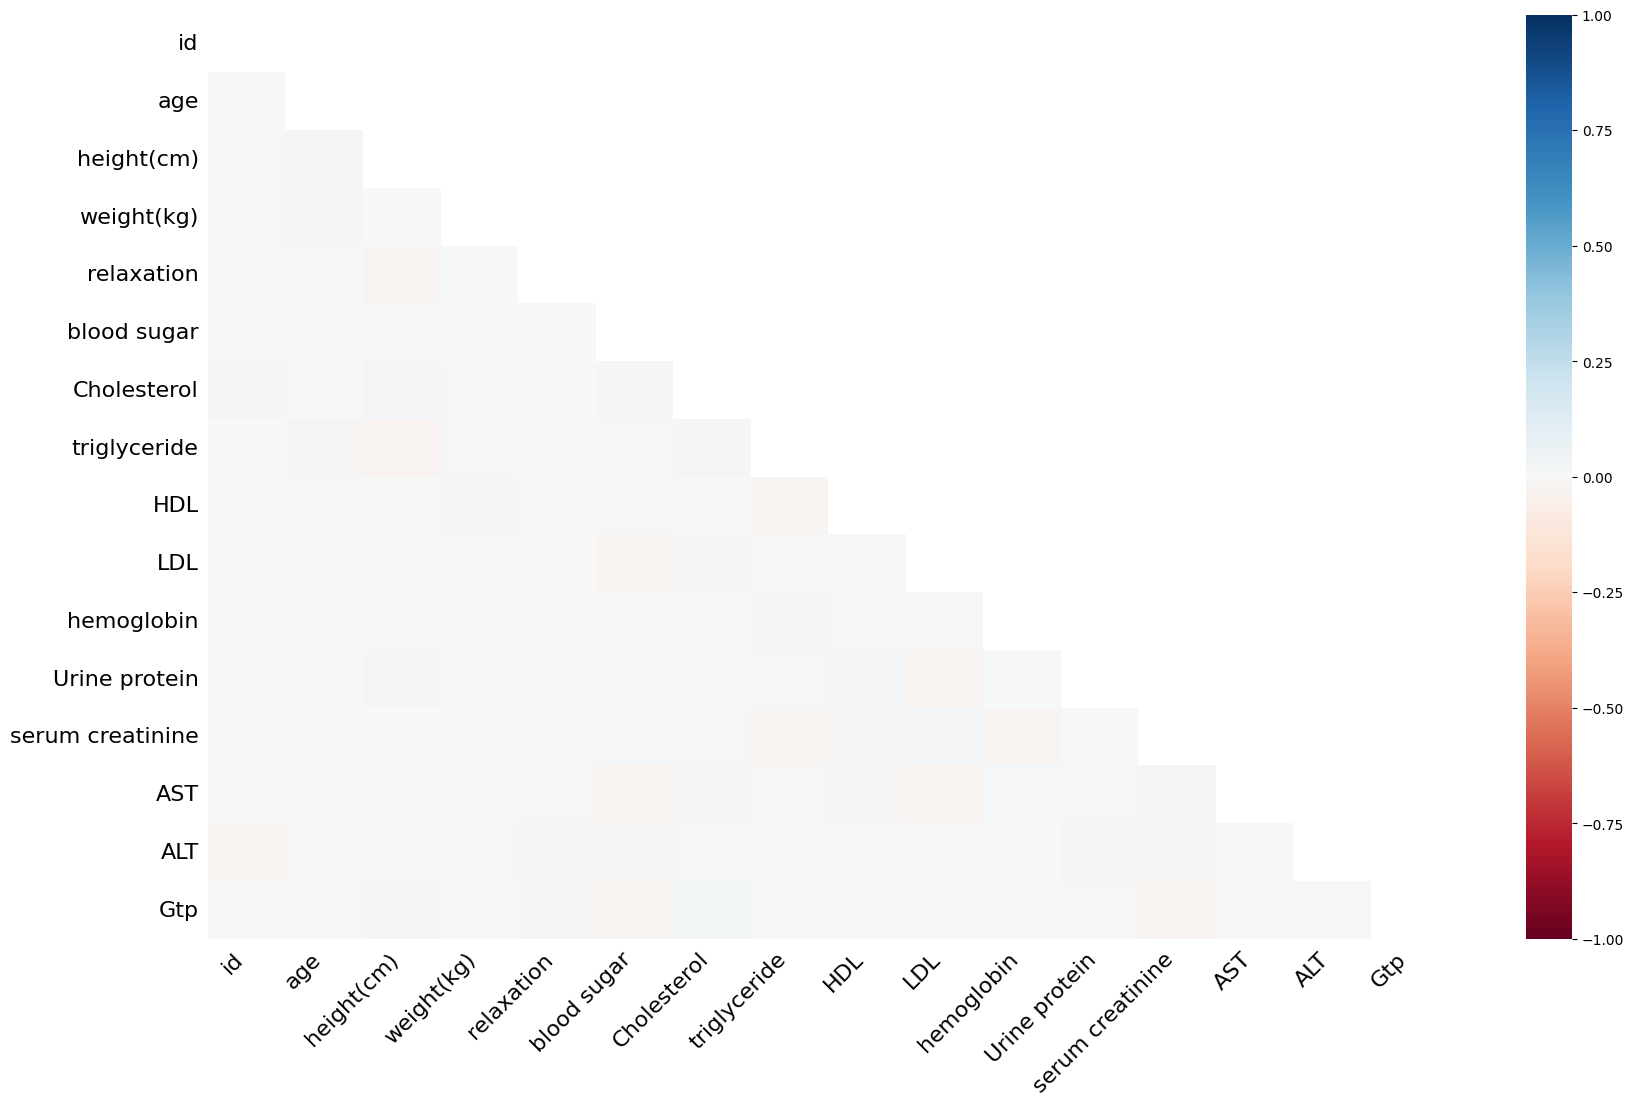

In [9]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [10]:
# Write your code here. Add as many boxes as you need.
df['weight(kg)'] = df['weight(kg)'].fillna(df['weight(kg)'].mean())

In [11]:
df['height(cm)'] = df['height(cm)'].fillna(df['height(cm)'].mean())

In [12]:
df.isnull().sum()

id                  1952
age                 1982
height(cm)             0
weight(kg)             0
relaxation          1910
blood sugar         1947
Cholesterol         1966
triglyceride        1007
HDL                 1962
LDL                 1966
hemoglobin          1961
Urine protein       1901
serum creatinine    1921
AST                 1923
ALT                 1919
Gtp                 1927
dental caries          0
blood pressure         0
dtype: int64

In [13]:
from datetime import datetime

# Define the current date (assuming today for simplicity)
current_date = datetime.now()

# Parse the 'age' column as dates and handle errors (e.g., invalid or missing dates)
df['age'] = pd.to_datetime(df['age'], errors='coerce')

# Calculate age in years
df['age'] = df['age'].apply(lambda dob: (current_date - dob).days // 365 if pd.notnull(dob) else None)

# Display a preview of the transformed data
df[['age']].head()


age
0   NaN
1  45.0
2  70.0
3  40.0
6  60.0

In [14]:
df.age = df.age.fillna(df.age.mean())

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [15]:
# Write your code here. Add as many boxes as you need.

df['serum creatinine'] = df['serum creatinine'].fillna(df['serum creatinine'].mean())

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [17]:
encoder = LabelEncoder()
df['triglyceride'] = encoder.fit_transform(df['triglyceride'])

In [18]:
encoder = LabelEncoder()
df['dental caries'] = encoder.fit_transform(df['dental caries'])

In [19]:
def knn_impute_data(data:pd.DataFrame, columns:list, n_neighbors:int):
   imputer = KNNImputer(n_neighbors=n_neighbors)
   data_copy = data.copy()

   for column in columns:
     data_copy[column] = imputer.fit_transform(data_copy[column].to_numpy().reshape(-1, 1))
   return data_copy

In [20]:
df = knn_impute_data(data=df, columns=['relaxation', 'blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'AST', 'ALT', 'Gtp'], n_neighbors=5)

In [21]:
from sklearn.impute import SimpleImputer
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 1)
df['Urine protein'] = constant_imputer.fit_transform([df['Urine protein']])[0]

In [22]:
df.isnull().sum()

id                  1952
age                    0
height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure         0
dtype: int64

In [23]:
df = df.drop(columns='id')

In [24]:
df.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [25]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(columns=['blood pressure'])
Y = df['blood pressure']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
xbg_model = XGBRegressor(learning_rate=0.1)
xbg_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
Y_pred = xbg_model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.4307219469012673
98.41882524637192


In [30]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=10)

In [31]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10)

In [32]:
Y_pred = rf.predict(X_test)

In [33]:
print(r2_score(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.44494870406883646
95.95925260014745


# Cross-Validation

In [43]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [44]:
param_grid = {
    'learning_rate' :[0.7,1.0,1.4],
    'subsample': [0.6,0.8,0.9],
    'colsample_bynode' :[0.6,0.8,0.9]        
}

In [45]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(estimator=xbg_model,param_grid=param_grid,cv=rkf)

In [46]:
X = df.drop(columns=['blood pressure'])
Y = df['blood pressure']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [47]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bynode': [0.6, 0.8, 0.9],
                         'learning_rate': [0.7, 1.0, 1.4],
                         'subsample': [0.6, 0.8, 0.9]})

In [48]:
print("Best Parameters:", cv.best_params_)
xbg_model = cv.best_estimator_

Best Parameters: {'colsample_bynode': 0.9, 'learning_rate': 0.7, 'subsample': 0.9}


In [49]:
Y_pred = xbg_model.predict(X_test)

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [50]:
# Write your code here. Add as many boxes as you need.
print(r2_score(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.37246518926481664
102.99175284974307
